
Les données 'data_iris' sont composées d'un relevé de 150 observations en dimension 5.

Le but de ce TP est de se familiariser avec la pratique de l'ACP, en essayant de bien comprendre les données de ce jeu simple.



In [2]:

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


## Question 1 : 
Recupérer les données de data_iris.csv avec pandas (bien faire attention au séparateur et à la décimale dans le csv)


In [3]:
data_iris=pd.read_csv("data_iris.csv",header=0,sep=",",decimal=".")

print(data_iris)


     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
5             5.4          3.9           1.7          0.4     Setosa
6             4.6          3.4           1.4          0.3     Setosa
7             5.0          3.4           1.5          0.2     Setosa
8             4.4          2.9           1.4          0.2     Setosa
9             4.9          3.1           1.5          0.1     Setosa
10            5.4          3.7           1.5          0.2     Setosa
11            4.8          3.4           1.6          0.2     Setosa
12            4.8          3.0           1.4          0.1     Setosa
13            4.3          3.0    


## Question 2 : 

A la vue des données en 4d, sauriez-vous facilement distinguer les differentes variétés d'Iris. Nous allons répondre à cette question en plusieurs étapes.



In [4]:
#Question 2.1) Extrayez les donnees quantitatives dans un numpy.array et observez les. Est-ce que les differentes variables sont echantillonnees sur la meme gamme de valeurs ?

X_orig=data_iris[["sepal.length","sepal.width","petal.length","petal.width"]].values   # exporte les donnees sous forme de np.array

print("observations brutes : ",X_orig)

# -> En observant les donnees chargees, on peut constater qu'elles sont sur des echelles differentes. Par exemple, la variable 0 a des valeurs comprises entre 4.3 et 7.9 alors que la variable 3 a des valeurs entre 0.1 et 2.5.


observations brutes :  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.

In [5]:

#Question 2.2)  Afin de comparer des mesures ayant la meme echelle, nous allons d'abord centrer et réduire les valeurs associees a chaque variable. Utilisez 'sklearn.preprocessing.StandardScaler' pour effectuer cette etape simplement.


from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X_orig)

print("observations centrees reduites : ",X)


observations centrees reduites :  [[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.1699881

In [6]:

#Question 2.3)    Effectuer un ACP sur les donnees centrees-reduites X. Pour cela, utilisez sklearn.decomposition.PCA

from sklearn.decomposition import PCA

pca = PCA()    #instancie l'objet qui va effectuer l'ACP
pca.fit_transform(X)  # effectue l'ACP



array([[-2.26470281e+00,  4.80026597e-01, -1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01, -2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01,  4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01,  9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01,  1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00,  2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02,  3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01, -8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00,  1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01, -2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00, -2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01,  9.37592444e-02,
      

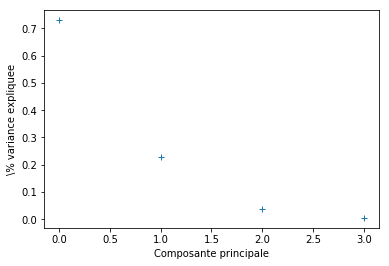

In [7]:

#Question 2.4) Trouvez et visualisez la variance expliquee par les composantes principales

plt.plot(pca.explained_variance_ratio_,'+')
plt.xlabel('Composante principale')
plt.ylabel('\% variance expliquee')
plt.show()



## Question 3 : 

Combien de composantes faut-il pour expliquer plus de 94% de la variabilité entre les individus ?

#### Réponse :

-> il en faut 2


## Question 4 : 
Comment interpréter les axes principaux 1 et 2



In [8]:

print(pca.components_)

print("Nom des variables=",list(data_iris.columns.values))

print("Composante 1=",pca.components_[0,:],"  (explique "+str(pca.explained_variance_ratio_[0]*100)+" pourcents de la variabilite)")

print("Composante 2=",pca.components_[1,:],"  (explique "+str(pca.explained_variance_ratio_[1]*100)+" pourcents de la variabilite)")


[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
Nom des variables= ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
Composante 1= [ 0.52106591 -0.26934744  0.5804131   0.56485654]   (explique 72.96244541329987 pourcents de la variabilite)
Composante 2= [0.37741762 0.92329566 0.02449161 0.06694199]   (explique 22.85076178670177 pourcents de la variabilite)


Interprétation :
- la composante 1 représente globalement la moyenne de ['sepal.length', 'sepal.width', , 'petal.width']
- la composante 2 représente globalement 'sepal.width'



## Question 5 : 
En projetant les données sur les deux axes principaux, est-ce que vous distinguez facilement deux sous-groupes de données ?


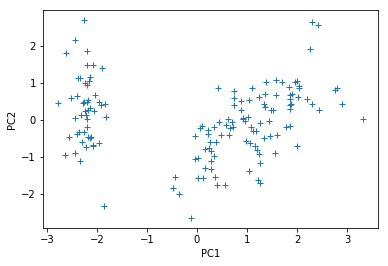

In [9]:


ProjData=np.dot(X,pca.components_.transpose())

plt.plot(ProjData[:,0],ProjData[:,1],'+')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


**Réponse :** oui !



## Question 6 : 
Les observations [0,50] du jeu de données sont des Iris de la variété 'Setosa', les observations [50,100] sont de la variété 'Versicolor', et les [100,150] sont de la variété 'Virginica'. Représentez ces variétés avec un jeu de couleurs différent sur les 2 composantes principales de l'ACP. Trouvez alors manuellement une règle de décision simple pour les distinguer sur ce plan principal.



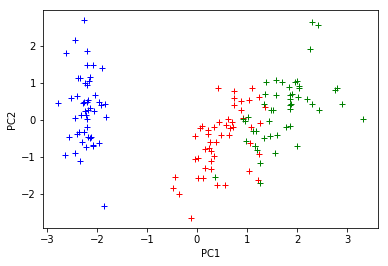

In [10]:


plt.plot(ProjData[0:50,0],ProjData[0:50,1],'b+')
plt.plot(ProjData[50:100,0],ProjData[50:100,1],'r+')
plt.plot(ProjData[100:150,0],ProjData[100:150,1],'g+')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


-> On va être bon avec deux règles linéaires
